In [ ]:
import pandas as pd
import numpy as np
import random

from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [ ]:
data = datasets.load_diabetes()

In [ ]:
X = pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
y = data.target

In [ ]:
random.seed(123)
#Split the data set into test and train here


In [ ]:
X.describe

<bound method NDFrame.describe of           age       sex       bmi  ...        s4        s5        s6
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]>

In [ ]:
y.mean()

152.13348416289594

In [ ]:
X['s1'].mean()

-8.835315586242054e-17

In [ ]:
X['s2'].mean()

1.327024211984792e-16

In [ ]:
X['s3'].mean()

-4.574646342983182e-16

In [ ]:
X['s4'].mean()

3.777301498233299e-16

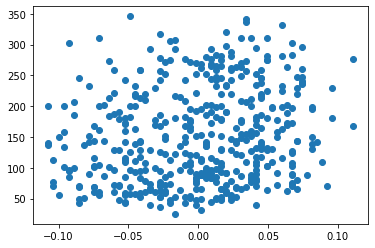

In [ ]:
plt.scatter(X['age'],y)

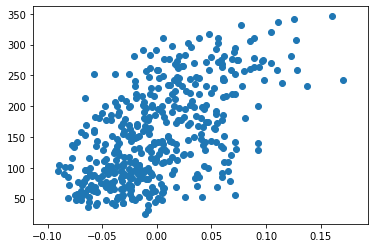

In [ ]:
plt.scatter(X['bmi'],y)

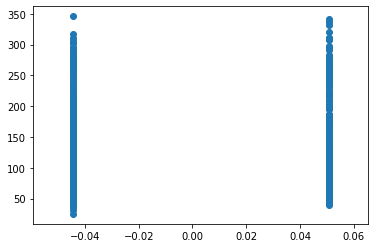

In [ ]:
plt.scatter(X['sex'],y)

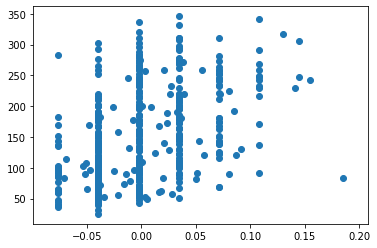

In [ ]:
plt.scatter(X['s4'],y)

In [ ]:
X.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1,0.0881614,0.241013,0.0352768,0.142637,-0.37909,0.332115,0.149918,0.208133
bmi,0.185085,0.0881614,1,0.395415,0.249777,0.26117,-0.366811,0.413807,0.446159,0.38868
bp,0.335427,0.241013,0.395415,1,0.24247,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.0352768,0.249777,0.24247,1,0.896663,0.0515194,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.26117,0.185558,0.896663,1,-0.196455,0.659817,0.318353,0.2906
s3,-0.075181,-0.37909,-0.366811,-0.178761,0.0515194,-0.196455,1,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1,0.46467
s6,0.301731,0.208133,0.38868,0.390429,0.325717,0.2906,-0.273697,0.417212,0.46467,1


In [ ]:
random.seed(123)

In [ ]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
x_test_set.count()

age    89
sex    89
bmi    89
bp     89
s1     89
s2     89
s3     89
s4     89
s5     89
s6     89
dtype: int64

In [ ]:
x_training_set.count()

age    353
sex    353
bmi    353
bp     353
s1     353
s2     353
s3     353
s4     353
s5     353
s6     353
dtype: int64

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_training_set,y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted_LR = lin_model.predict(x_test_set)

In [ ]:
mean_squared_error(y_test_set,y_predicted_LR)

2992.5576814529445

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=2,random_state=1,ccp_alpha=0)
dt_model.fit(x_training_set,y_training_set)

DecisionTreeRegressor(ccp_alpha=0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
y_predicted_DT =dt_model.predict(x_test_set)

In [ ]:
mean_squared_error(y_test_set,y_predicted_DT)

4090.783437338862

In [ ]:
rft_model = RandomForestRegressor(max_depth=2,random_state=1)
rft_model.fit(x_training_set,y_training_set)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
y_hat = rft_model.predict(x_test_set)

In [ ]:
mean_squared_error(y_test_set,y_hat)

3550.535754627276

In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_training_set,y_training_set)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_predicted_Lasso = lasso_model.predict(x_test_set)

In [ ]:
mean_squared_error(y_test_set,y_predicted_Lasso)

3026.8691720962242

In [ ]:
ridge_model = Ridge(alpha=.5)
ridge_model.fit(x_training_set,y_training_set)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_predicted_ridge = ridge_model.predict(x_test_set)

In [ ]:
mean_squared_error(y_test_set,y_predicted_ridge)

3106.2573622868304